In [ ]:
# ==================================================================
# Universidade Estadual de Feira de Santana
# Mestrado em Ciência da Computação
# Disciplina: PGCC015 - Inteligência Computacional
# Professor: Matheus Giovanni Pires
# Aluno: Noberto Pires Maciel
# EPC07 - 10/12/2020
# Algoritmos Evolutivos: Alg. Genético - problema da antena acoplada
# ==================================================================

In [ ]:
# instalação de bibliotecas
#!pip install jmetalpy
!pip install -U pymoo

In [ ]:
# import jmetal
from typing import TypeVar, List
from jmetal.config import store
from jmetal.util.solution import get_non_dominated_solutions
from jmetal.core.observer import Observer
from jmetal.core.solution import BinarySolution, FloatSolution, IntegerSolution, PermutationSolution
from jmetal.core.problem import Problem
from abc import ABC, abstractmethod
from typing import Generic, TypeVar, List
from jmetal.algorithm.multiobjective.nsgaii import NSGAII
from jmetal.lab.visualization import Plot, InteractivePlot
from jmetal.operator import SBXCrossover, PolynomialMutation
from jmetal.problem import ZDT2
from jmetal.util.comparator import GDominanceComparator
from jmetal.util.observer import ProgressBarObserver, VisualizerObserver
from jmetal.util.solution import print_function_values_to_file, print_variables_to_file, read_solutions
from jmetal.util.termination_criterion import StoppingByEvaluations
from jmetal.algorithm.singleobjective.local_search import LocalSearch
from jmetal.operator import BitFlipMutation
from jmetal.problem import OneMax
from jmetal.core.algorithm import EvolutionaryAlgorithm
from jmetal.core.operator import Mutation, Crossover, Selection
from jmetal.util.evaluator import Evaluator
from jmetal.util.generator import Generator
from jmetal.util.termination_criterion import TerminationCriterion

Item 1 EPC07 Geracional: maximo global de f(x): [2.85027374]  x: [1.85055287]  Cross tx:  70.0 %


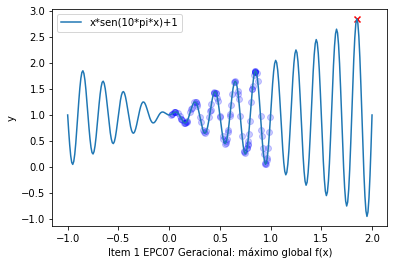

KeyboardInterrupt: ignored

In [29]:
# ==================================================================
# Universidade Estadual de Feira de Santana
# Mestrado em Ciência da Computação
# Disciplina: PGCC015 - Inteligência Computacional
# Professor: Matheus Giovanni Pires
# Aluno: Noberto Pires Maciel
# EPC07 - 10/12/2020
# Algoritmo genético - problema da antena acoplada
# lib: pymoo
# ==================================================================

# import general libs
import math
import random
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import pymoo
from pymoo.algorithms.so_genetic_algorithm import GA
from pymoo.optimize import minimize
from pymoo.interface import mutation,crossover
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_selection, get_problem, get_termination, get_sampling, get_crossover, get_mutation
from pymoo.visualization.scatter import Scatter
from pymoo.model.problem import Problem

x = []
y = []

def sin(x):
  for i in range(len(x)):
    y.append(x[i]*math.sin(10*math.pi*x[i])+1)


class AntenaAcoplada(Problem):
    def __init__(self,**kwargs):
        super().__init__(n_var=1, n_obj=1, n_constr=0, xl=-1, xu=2, elementwise_evaluation=True, **kwargs)
    def _evaluate(self, x, out, *args, **kwargs):
        out["X"] = x
        out["F"] = -1*(x*math.sin(10*math.pi*x)+1)

problem = AntenaAcoplada()

# roleta
def weighted_random_choice(choices):
    max = sum(choices.values())
    pick = random.uniform(0, max)
    current = 0
    for key, value in choices.items():
        current += value
        if current > pick:
            return key


selection = get_selection('tournament', {'pressure' : 2, 'func_comp' : weighted_random_choice})

# Execute um AG Geracional,variando a taxa de cruzamento em 70%, 80% e 90%. tx_cruz = prob
# A taxa de mutação  é  de  1% (mutation prob) 
# A taxa  do  elitismo  é  10%.
# Gere  um  único  gráfico ilustrando  o comportamento do melhor indivíduo para as três diferentes taxas de cruzamento
# Crossover: eta = Grau de aglomeração do crossover. Um eta alto produzirá crianças que se parecem com seus pais, enquanto um eta pequeno produzirá soluções muito mais diferentes.
# Mutation : eta = Grau de aglomeração da mutação. Um eta alto produzirá um mutante semelhante a seu pai, enquanto um eta pequeno produzirá uma solução muito mais diferente.

# Questões para Matheus:
# seed é o mesmo que elitismo? 
# taxa de mutação e taxa de cruzamento é dada por prob?

def run(cross=0.7,ag=None,mut=0.01):
    algorithm = GA(pop_size=100,
                      sampling=get_sampling("real_random"),
                      crossover=get_crossover("real_one_point",prob=cross),
                      mutation=get_mutation("real_pm", eta=20, prob=mut), #bin_bitflip
                      n_offsprings=ag, #ag=1 -> steady-state, ag=None -> geracional
                      eliminate_duplicates=True)

    X,F = problem.evaluate(np.random.rand(100, 1),return_values_of=["X","F"])

    termination = get_termination("n_eval", 25000)

    res = minimize(problem,
                  algorithm,
                  ('n_gen', 200),
                  termination,
                  seed=10, # elitismo
                  verbose=False)
    return X,F,res

# questão 1 AG: cruzamento em 70%, 80% e 90%. Taxa de mutação de 1%. Taxa  do  elitismo  10%
# questão 2 ST: cruzamento em 70%, 80% e 90%. Taxa de mutação de 1%. Taxa  do  elitismo  10%
bestCross = []
for j in [0.7,0.8,0.9]:
    X,F,res = run(cross=j,ag=None,mut=0.1)
    for i in np.arange(-1,2.01,0.01):
      x.append(i)
    sin(x)
    plt.plot(x,y, label="x*sen(10*pi*x)+1")
    plt.scatter(res.X,res.F*(-1), color="red",marker="x")
    print('Item 1 EPC07 Geracional: maximo global de f(x):',res.F*(-1),' x:', res.X,' Cross tx: ',j*100,'%')
    #print('Item 2 EPC07 Steady-State: maximo global de f(x):',res.F*(-1),' x:', res.X,' Cross tx: ',j*100,'%')

    bestCross.append((res.F*(-1),j*100))
    plt.scatter(X,F*(-1), color="blue", alpha=0.2)
    plt.xlabel("Item 1 EPC07 Geracional: máximo global f(x)")
    #plt.xlabel("Item 2 EPC07 Steady-State: máximo global f(x)")
    plt.ylabel("y")
    plt.legend(loc='upper left')
    plt.show()
    x = []
    y = []

# questão 3 AG: mutação  em  1%,  5%  e  10%. Taxa  do elitismo  10%. Taxa de cruzamento?
# questão 4 ST: mutação  em  1%,  5%  e  10%. Taxa  do elitismo  10%. Taxa de cruzamento?
for j in [0.01,0.05,0.1]:
    X,F,res = run(cross=max(bestCross)[1],ag=None,mut=j)
    for i in np.arange(-1,2.01,0.01):
      x.append(i)
    sin(x)
    plt.plot(x,y, label="x*sen(10*pi*x)+1")
    plt.scatter(res.X,res.F*(-1), color="red",marker="x")
    print('Item 3 EPC07 Geracional: maximo global de f(x):',res.F*(-1),' x:', res.X,' Cross tx: ',max(bestCross)[1],'% Mutation tx: ',j*100,'%')
    #print('Item 4 EPC07 Steady-State: maximo global de f(x):',res.F*(-1),' x:', res.X,' Cross tx: ',max(bestCross)[1],'% Mutation tx: ',j*100,'%')

    plt.scatter(X,F*(-1), color="blue", alpha=0.2)
    plt.xlabel("Item 3 EPC07 Geracional: máximo global f(x)")
    #plt.xlabel("Item 4 EPC07 Steady-State: máximo global f(x)")
    plt.ylabel("y")
    plt.legend(loc='upper left')
    plt.show()
    x = []
    y = []

[-2.0, -1.99, -1.98, -1.97, -1.96, -1.95, -1.94, -1.93, -1.92, -1.91, -1.9, -1.89, -1.88, -1.8699999999999999, -1.8599999999999999, -1.8499999999999999, -1.8399999999999999, -1.8299999999999998, -1.8199999999999998, -1.8099999999999998, -1.7999999999999998, -1.7899999999999998, -1.7799999999999998, -1.7699999999999998, -1.7599999999999998, -1.7499999999999998, -1.7399999999999998, -1.7299999999999998, -1.7199999999999998, -1.7099999999999997, -1.6999999999999997, -1.6899999999999997, -1.6799999999999997, -1.6699999999999997, -1.6599999999999997, -1.6499999999999997, -1.6399999999999997, -1.6299999999999997, -1.6199999999999997, -1.6099999999999997, -1.5999999999999996, -1.5899999999999996, -1.5799999999999996, -1.5699999999999996, -1.5599999999999996, -1.5499999999999996, -1.5399999999999996, -1.5299999999999996, -1.5199999999999996, -1.5099999999999996, -1.4999999999999996, -1.4899999999999995, -1.4799999999999995, -1.4699999999999995, -1.4599999999999995, -1.4499999999999995, -1.4399

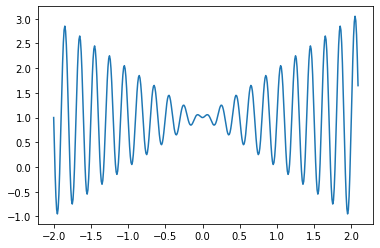

In [ ]:
# plot eq
x = []
y = []

def sin(x):
  for i in range(len(x)):
    y.append(x[i]*math.sin(10*math.pi*x[i])+1)

for i in np.arange(-2,2.1,0.01):
  x.append(i)

sin(x)
print(x)
print(y)
plt.plot(x,y)

In [ ]:
# teste jmetal 1
class AntenaAcoplada(Problem):
    def __init__(self,**kwargs):
        super().__init__(n_var=1, n_obj=1, n_constr=0, xl=-1, xu=2, elementwise_evaluation=True, **kwargs)
    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = x
        out["G"] = x*math.sin(10*math.pi*x)+1

# roleta
def weighted_random_choice(choices):
    max = sum(choices.values())
    pick = random.uniform(0, max)
    current = 0
    for key, value in choices.items():
        current += value
        if current > pick:
            return key

problem = AntenaAcoplada()

off = crossover(get_crossover("bin_two_point"),F,G)

mut = mutation(get_mutation("bin_bitflip", prob=0.1), G)

def show(M):
    plt.figure(figsize=(4,4))
    plt.imshow(M, cmap='Greys',  interpolation='nearest')
    plt.show()

show(mut)

algorithm = GA(
    pop_size=100,
    eliminate_duplicates=True)

res = minimize(problem,
               algorithm,
               selection = get_selection('tournament', {'pressure' : 4, 'func_comp' : binary_tournament}),
               seed=1,
               verbose=True)

print("Melhores solucoes encontradas: \nG = %s\nF = %s" % (res.G, res.F*(-1)))



In [ ]:
# teste jmetal 2
if __name__ == '__main__':
    problem = OneMax(number_of_bits=1024)

    max_evaluations = 10000
    algorithm = LocalSearch(
        problem=problem,
        mutation=BitFlipMutation(probability=1.0 / problem.number_of_bits),
        termination_criterion=StoppingByEvaluations(max_evaluations=max_evaluations)
    )

    algorithm.run()
    result = algorithm.get_result()

    # Save results to file
    print_function_values_to_file(result, 'FUN.'+ algorithm.get_name() + "." + problem.get_name())
    print_variables_to_file(result, 'VAR.' + algorithm.get_name() + "." + problem.get_name())

    print('Algorithm: ' + algorithm.get_name())
    print('Problem: ' + problem.get_name())
    print('Solution: ' + result.get_binary_string())
    print('Fitness:  ' + str(result.objectives[0]))
    print('Computing time: ' + str(algorithm.total_computing_time))

In [ ]:
# teste jmetal 3
class SubsetSum(BinaryProblem):
   def __init__(self, C: int, W: list):
      super(SubsetSum, self).__init__(reference_front=None)
      self.C = C
      self.W = W
      self.number_of_bits = len(self.W)
      self.number_of_objectives = 1
      self.number_of_variables = 1
      self.number_of_constraints = 0
      self.obj_directions = [self.MAXIMIZE]
      self.obj_labels = ['Sum']

def evaluate(self, solution: BinarySolution) -> BinarySolution:
    total_sum = 0.0
    for index, bits in enumerate(solution.variables[0]):
        if bits:
            total_sum += self.W[index]
    if total_sum > self.C:
        total_sum = self.C - total_sum * 0.1
        if total_sum < 0.0:
            total_sum = 0.0
    solution.objectives[0] = -1.0 * total_sum
    return solution

def create_solution(self) -> BinarySolution:
    new_solution = BinarySolution(number_of_variables=self.number_of_variables,number_of_objectives=self.number_of_objectives)
    new_solution.variables[0] = [True if random.randint(0, 1) == 0 else False for _ in range(self.number_of_bits)]
    return new_solution

    def get_name(self) -> str:
        return 'Subset Sum'

problem = SubsetSum(9,[3,34,4,12,5,2])

#problem = ZDT2()

max_evaluations = 25000

algorithm = NSGAII(
    problem=problem,
    population_size=100,
    offspring_population_size=200,
    mutation=PolynomialMutation(probability=1.0 /problem.number_of_variables, distribution_index=20),
    crossover=SBXCrossover(probability=1.0, distribution_index=20),
    termination_criterion=StoppingByEvaluations(max_evaluations)
)

algorithm.run()

solutions = algorithm.get_result()

front = get_non_dominated_solutions(solutions)

plot_front = Plot(title='Pareto', axis_labels=['x', 'y'])
plot_front.plot(front, label='NSGAII-ZDT2')

In [ ]:
# teste jmetal 4
if __name__ == '__main__':
    problem = ZDT2()
    problem.reference_front = read_solutions(filename='resources/reference_front/ZDT2.pf')

    reference_point = [0.2, 0.5]

    max_evaluations = 25000
    algorithm = NSGAII(
        problem=problem,
        population_size=100,
        offspring_population_size=100,
        mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables, distribution_index=20),
        crossover=SBXCrossover(probability=1.0, distribution_index=20),
        dominance_comparator=GDominanceComparator(reference_point),
        termination_criterion=StoppingByEvaluations(max_evaluations=max_evaluations)
    )

    algorithm.observable.register(observer=ProgressBarObserver(max=max_evaluations))
    algorithm.observable.register(
        observer=VisualizerObserver(reference_front=problem.reference_front, reference_point=reference_point))

    algorithm.run()
    front = algorithm.get_result()

    # Plot front
    plot_front = Plot(title='Pareto front approximation. Problem: ' + problem.get_name(),
                      reference_front=problem.reference_front, axis_labels=problem.obj_labels)
    plot_front.plot(front, label=algorithm.label, filename=algorithm.get_name())

    # Plot interactive front
    plot_front = InteractivePlot(title='Pareto front approximation. Problem: ' + problem.get_name(),
                                 reference_front=problem.reference_front, axis_labels=problem.obj_labels)
    plot_front.plot(front, label=algorithm.label, filename=algorithm.get_name())

    # Save results to file
    print_function_values_to_file(front, 'FUN.' + algorithm.label)
    print_variables_to_file(front, 'VAR.' + algorithm.label)

    print('Algorithm (continuous problem): ' + algorithm.get_name())
    print('Problem: ' + problem.get_name())
    print('Computing time: ' + str(algorithm.total_computing_time))

In [ ]:
# teste jmetal 5

S = TypeVar('S')
R = TypeVar('R')

class AntenaAcoplada_jmetal(Problem):
    def __init__(self,**kwargs):
        super().__init__(n_var=1, n_obj=1, n_constr=0, xl=-1, xu=2, elementwise_evaluation=True, **kwargs)
    def evaluate(self, x, out, *args, **kwargs):
        out["F"] = x
        out["G"] = x*math.sin(10*math.pi*x)+1
    def create_solution(self) -> BinarySolution:
        new_solution = BinarySolution(number_of_variables=self.number_of_variables,number_of_objectives=self.number_of_objectives)
        new_solution.variables[0] = [True if random.randint(0, 1) == 0 else False for _ in range(self.number_of_bits)]
        return new_solution
    def get_name(self) -> str:
        return 'Subset Sum'

class GeneticAlgorithm(EvolutionaryAlgorithm[S, R]):

    def __init__(self,
                 problem: Problem,
                 population_size: int,
                 offspring_population_size: int,
                 mutation: Mutation,
                 crossover: Crossover,
                 selection: Selection,
                 termination_criterion: TerminationCriterion = store.default_termination_criteria,
                 population_generator: Generator = store.default_generator,
                 population_evaluator: Evaluator = store.default_evaluator):
        super(GeneticAlgorithm, self).__init__(
            problem=problem,
            population_size=population_size,
            offspring_population_size=offspring_population_size)
        self.mutation_operator = mutation
        self.crossover_operator = crossover
        self.selection_operator = selection

        self.population_generator = population_generator
        self.population_evaluator = population_evaluator

        self.termination_criterion = termination_criterion
        self.observable.register(termination_criterion)

        self.mating_pool_size = \
            self.offspring_population_size * \
            self.crossover_operator.get_number_of_parents() // self.crossover_operator.get_number_of_children()

        if self.mating_pool_size < self.crossover_operator.get_number_of_children():
            self.mating_pool_size = self.crossover_operator.get_number_of_children()


    def create_initial_solutions(self) -> List[S]:
        return [self.population_generator.new(self.problem)
                for _ in range(self.population_size)]



    def evaluate(self, population: List[S]):
        return self.population_evaluator.evaluate(population, self.problem)



    def stopping_condition_is_met(self) -> bool:
        return self.termination_criterion.is_met



    def selection(self, population: List[S]):
        mating_population = []

        for i in range(self.mating_pool_size):
            solution = self.selection_operator.execute(population)
            mating_population.append(solution)

        return mating_population



    def reproduction(self, mating_population: List[S]) -> List[S]:
        number_of_parents_to_combine = self.crossover_operator.get_number_of_parents()

        if len(mating_population) % number_of_parents_to_combine != 0:
            raise Exception('Wrong number of parents')

        offspring_population = []
        for i in range(0, self.offspring_population_size, number_of_parents_to_combine):
            parents = []
            for j in range(number_of_parents_to_combine):
                parents.append(mating_population[i + j])

            offspring = self.crossover_operator.execute(parents)

            for solution in offspring:
                self.mutation_operator.execute(solution)
                offspring_population.append(solution)
                if len(offspring_population) >= self.offspring_population_size:
                    break

        return offspring_population



    def replacement(self, population: List[S], offspring_population: List[S]) -> List[S]:
        population.extend(offspring_population)

        population.sort(key=lambda s: s.objectives[0])

        return population[:self.population_size]



    def get_result(self) -> R:
        return self.solutions[0]



    def get_name(self) -> str:
        return 'Genetic algorithm'

problem = AntenaAcoplada_jmetal()
algorithm = GeneticAlgorithm(
        problem=problem,
        population_size=100,
        offspring_population_size=100,
        mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables, distribution_index=20),
        selection = get_selection('tournament', {'pressure' : 4, 'func_comp' : binary_tournament}),
        crossover=SBXCrossover(probability=1.0, distribution_index=20),
        termination_criterion=StoppingByEvaluations(max_evaluations=max_evaluations)
    )

algorithm

In [ ]:
selection = get_selection('tournament', {'pressure' : 2, 'func_comp' : binary_tournament})
res = minimize(
    problem,
    get_algorithm("ga",
                  pop_size=100,
                  sampling=get_sampling("real_random"),
                  crossover=get_crossover("real_sbx", prob=0.5,eta=20),
                  mutation=get_mutation("real_pm", eta=1, prob=0.1),
                  n_offsprings=1, #steady-state
                  eliminate_duplicates=True),
    termination=('n_gen', 200),
    verbose=False)

print(res.X)

[-0.99750971]
